# Clasificación de dígitos escritos a mano con tensorflow

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import random as python_random

2025-01-09 17:41:35.111143: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-09 17:41:35.123859: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736462495.139819  140247 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736462495.144713  140247 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-09 17:41:35.161406: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:
def reset_seeds():
   np.random.seed(142) 
   python_random.seed(142)
   tf.random.set_seed(142)

reset_seeds() 

In [4]:
# Función para visualizar una imagen
def visualize_image(image, label=None, prediction=None):
    plt.imshow(image, cmap='gray')
    title = ""
    if label is not None:
        title += f"Etiqueta real: {label} "
    if prediction is not None:
        title += f"| Predicción: {prediction}"
    plt.title(title)
    plt.axis('off')
    plt.show()

In [5]:
# Cargar el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar las imágenes (valores entre 0 y 1)
x_train, x_test = x_train / 255.0, x_test / 255.0


In [6]:
print("Image data:", x_test[0])
print("\nImage label:",y_test[0])

Image data: [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.   

In [7]:
# Crear el modelo de red neuronal
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Aplanar las imágenes de 28x28 a un vector de 784 elementos
    #Dense(392, activation='relu'),  # Capa oculta con 392 neuronas y activación ReLU
    Dense(128, activation='relu'),  # Capa oculta con 128 neuronas y activación ReLU
    Dense(64, activation='relu'),  # Capa oculta con 64 neuronas y activación ReLU
    Dense(10, activation='softmax')  # Capa de salida con 10 neuronas (una para cada dígito)
])
tf.keras.backend.clear_session()

# Compilar el modelo
model.compile(optimizer='adafactor', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Optimizadores
# sgd
# adam
# adadelta
# adafactor
# adagrad

/home/tuteggito/Downloads/big data/material/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1736462498.198406  140247 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1191 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [8]:
# Configurar TensorBoard
log_dir = "logs/fit/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [9]:
# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=15, batch_size=128, callbacks=[tensorboard_callback])

Epoch 1/15


I0000 00:00:1736462500.566163  141330 service.cc:148] XLA service 0x732be8004cb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1736462500.566187  141330 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2025-01-09 17:41:40.659212: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1736462500.828406  141330 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-01-09 17:41:41.486792: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_250', 24 bytes spill stores, 24 bytes spill loads



 42/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1311 - loss: 2.3086

I0000 00:00:1736462503.327700  141330 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


445/469 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4833 - loss: 1.7099

2025-01-09 17:41:45.064997: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_250', 12 bytes spill stores, 12 bytes spill loads

2025-01-09 17:41:45.300687: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_250', 12 bytes spill stores, 12 bytes spill loads



469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.4945 - loss: 1.6813
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8820 - loss: 0.4464
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9090 - loss: 0.3257
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9226 - loss: 0.2787
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9313 - loss: 0.2489
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9367 - loss: 0.2268
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9409 - loss: 0.2090
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9452 - loss: 0.1941
Epoch 9/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9492 - loss: 0.1813
Epoch 10/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9519 - loss: 0.1701
Epoch 11/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9550 - loss: 0.1602
Epoch 12/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

In [10]:
# Evaluar el modelo con datos de prueba
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Pérdida en los datos de prueba: {loss}")
print(f"Precisión en los datos de prueba: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9538 - loss: 0.1539
Pérdida en los datos de prueba: 0.13360382616519928
Precisión en los datos de prueba: 0.9592999815940857


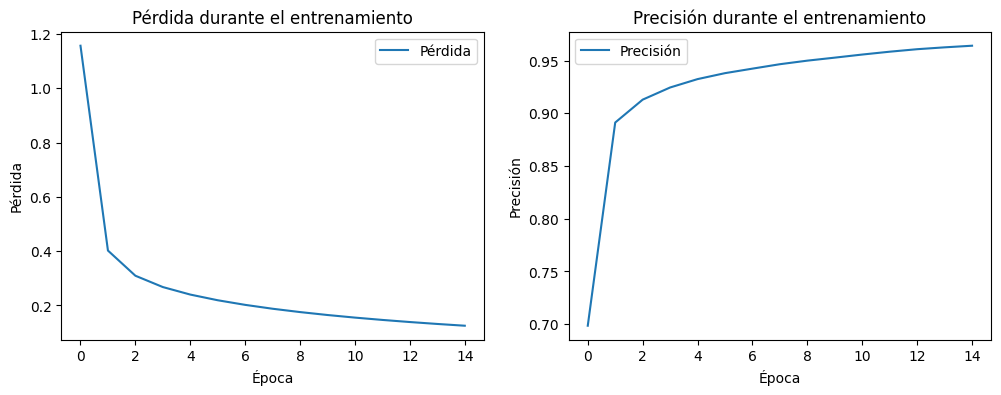

In [11]:
# Graficar la función de pérdida y precisión
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    
    # Pérdida
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Pérdida')
    plt.title('Pérdida durante el entrenamiento')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()

    # Precisión
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Precisión')
    plt.title('Precisión durante el entrenamiento')
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    plt.legend()

    plt.show()

plot_training_history(history)

In [12]:
# Ejemplo de predicción
def predict_digit(image):
    image = image / 255.0  # Normalizar la imagen
    image = image.reshape(1, 28, 28)  # Cambiar la forma para que sea compatible con el modelo
    prediction = model.predict(image)
    print(prediction)
    return tf.argmax(prediction, axis=1).numpy()[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
[[0.09989417 0.09831648 0.10116766 0.101248   0.09839827 0.10058089
  0.0964046  0.10481792 0.09877323 0.10039877]]


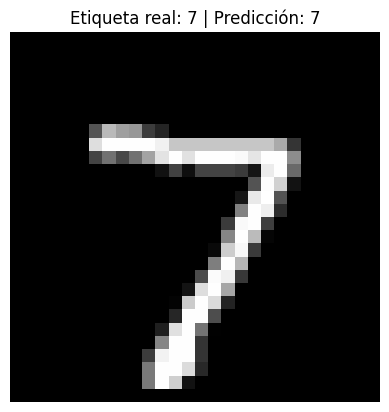

Etiqueta real: 7
Etiqueta predicha: 7


In [13]:
# Cargar una imagen del conjunto de prueba para predecir
digit_index = 0  # Cambiar para predecir otros dígitos
predicted_label = predict_digit(x_test[digit_index])
visualize_image(x_test[digit_index], label=y_test[digit_index], prediction=predicted_label)
print(f"Etiqueta real: {y_test[digit_index]}")
print(f"Etiqueta predicha: {predicted_label}")


In [14]:
# Guardar el modelo entrenado
%rm mnist_classifier_model.keras
model.save("mnist_classifier_model.keras")

In [15]:
#%load_ext tensorboard

In [16]:
#%tensorboard --logdir logs/fit